Importing the necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Data/train.csv')
train

/home/amon/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [4]:
test = pd.read_csv('Data/test.csv')
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [5]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [6]:
# Assuming that the stores were open
cleaned_test = test.fillna(1)

In [7]:
cleaned_test.isna().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
store = pd.read_csv('Data/store.csv')
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
cleaned_store = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())
cleaned_store = store.fillna(0)

In [11]:
cleaned_store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [12]:
sample_sub = pd.read_csv('Data/sample_submission.csv')
sample_sub

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [13]:
sample_sub.isna().sum()

Id       0
Sales    0
dtype: int64

In [14]:
merged = train.merge(cleaned_store,on=["Store"],how="inner")
merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [15]:
merged['Date'] = pd.to_datetime(merged['Date'],infer_datetime_format=True)
merged['Month'] = merged["Date"].dt.month
merged['Quarter'] = merged["Date"].dt.quarter
merged["Year"] = merged["Date"].dt.year

In [16]:
merged["Day"] = merged["Date"].dt.day
merged["Week"] = merged["Date"].dt.week
merged["Season"] = np.where(merged["Month"].isin([3,4,5]),"spring",
                            np.where(merged["Month"].isin([6,7,8]),
                                    "summer",np.where(merged["Month"].isin([9,10,11]),"fall",
                                                     np.where(merged["Month"].isin([12,1,2]),
                                                             "winter","None"))))

<ipython-input-16-7ad837b733e8>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  merged["Week"] = merged["Date"].dt.week


In [17]:
merged[["Date","Year","Month","Day","Week","Quarter","Season"]]

,Date,Year,Month,Day,Week,Quarter,Season
0,2015-07-31,2015,7,31,31,3,summer
1,2015-07-30,2015,7,30,31,3,summer
2,2015-07-29,2015,7,29,31,3,summer
3,2015-07-28,2015,7,28,31,3,summer
4,2015-07-27,2015,7,27,31,3,summer
...,...,...,...,...,...,...,...
1017204,2013-01-05,2013,1,5,1,1,winter
1017205,2013-01-04,2013,1,4,1,1,winter
1017206,2013-01-03,2013,1,3,1,1,winter
1017207,2013-01-02,2013,1,2,1,1,winter


In [ ]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=39, aspect=15)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

plot_hist(train, "Sales", "green")

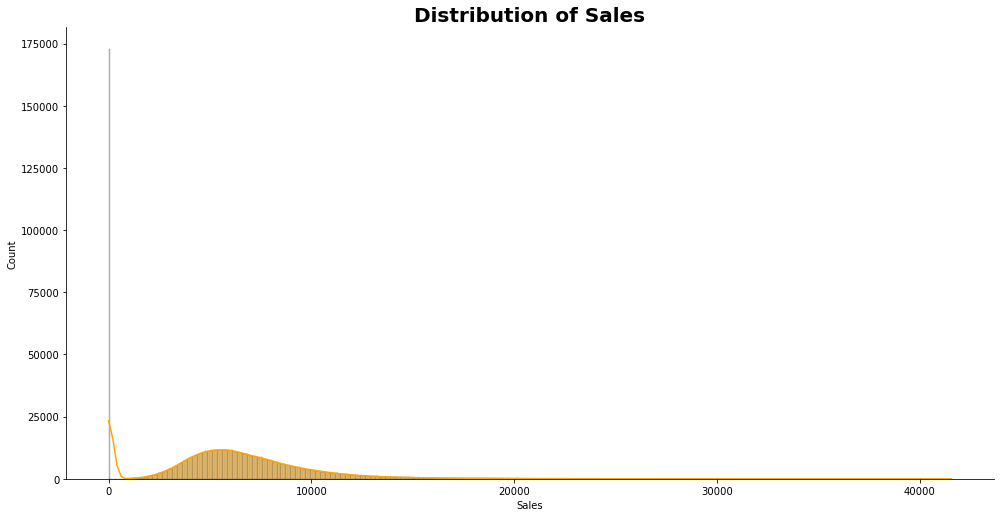

In [20]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
plot_hist(merged, "Sales", "orange")

<AxesSubplot:xlabel='Season', ylabel='Sales'>

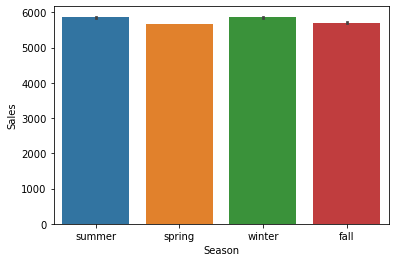

In [18]:
sns.barplot(x="Season", y="Sales", data=merged)

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

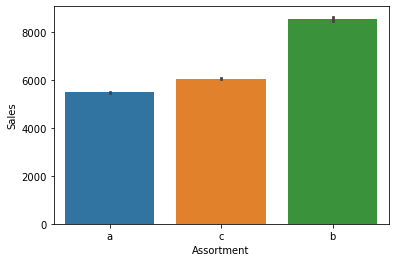

In [19]:
sns.barplot(x="Assortment",y="Sales",data=merged)

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

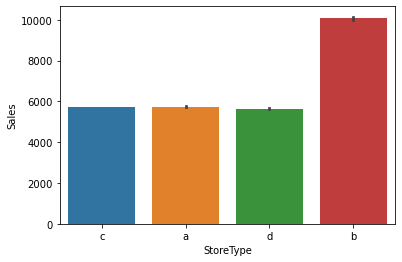

In [20]:
sns.barplot(x="StoreType",y="Sales",data=merged)

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

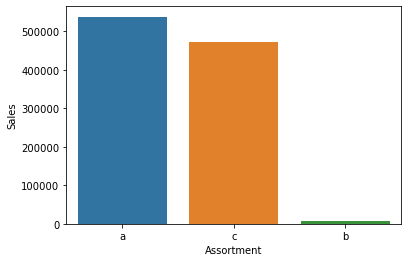

In [21]:
sns.barplot(x="Assortment", y="Sales", data=merged,estimator=np.size)

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

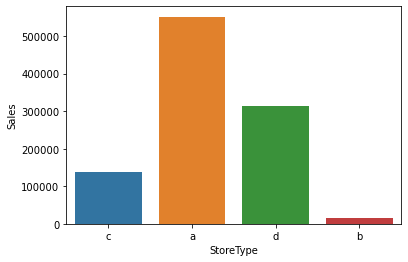

In [22]:
sns.barplot(x="StoreType", y="Sales", data=merged,estimator=np.size)

/home/amon/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


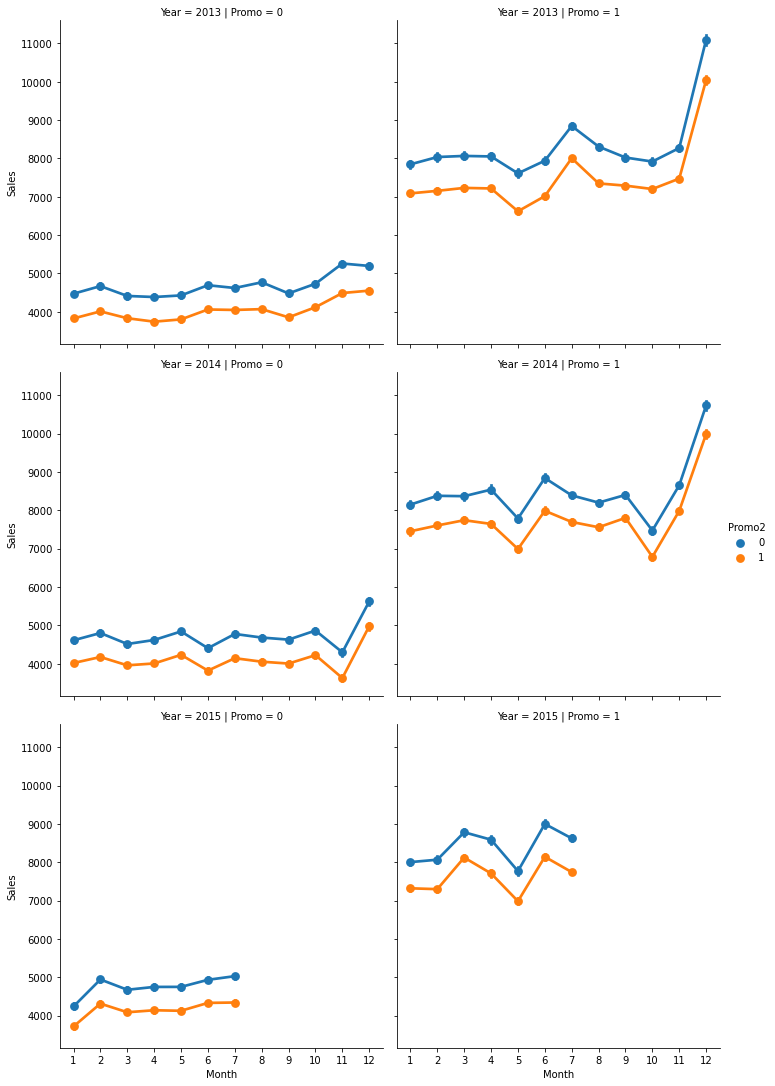

In [23]:
sns.factorplot(data = merged, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year")

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

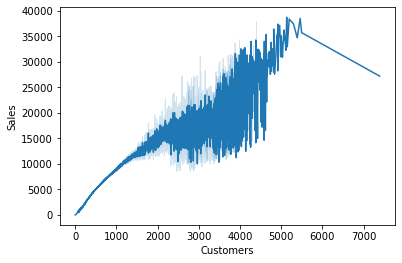

In [24]:
sns.lineplot(data = merged, x = 'Customers', y = "Sales")